In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

<Axes: xlabel='label', ylabel='count'>

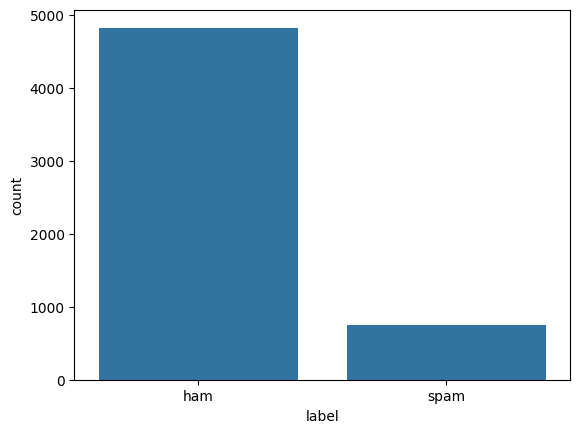

In [64]:
sns.countplot(data=df, x='label')

In [65]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [66]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    text = text.lower()
    text = ''.join([t for t in text if t not in string.punctuation])
    text = [t for t in text.split() if t not in stopwords.words('english')]
    st = Stemmer()
    text = [st.stem(t) for t in text]
    return text

In [67]:
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']

In [68]:
df['message'][:20].apply(process)

0     [go, jurong, point, crazi, avail, bugi, n, gre...
1                          [ok, lar, joke, wif, u, oni]
2     [free, entri, 2, wkli, comp, win, fa, cup, fin...
3         [u, dun, say, earli, hor, u, c, alreadi, say]
4     [nah, dont, think, goe, usf, live, around, tho...
5     [freemsg, hey, darl, 3, week, word, back, id, ...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, mell, mell, oru, minnaminungint...
8     [winner, valu, network, custom, select, receiv...
9     [mobil, 11, month, u, r, entitl, updat, latest...
10    [im, gonna, home, soon, dont, want, talk, stuf...
11    [six, chanc, win, cash, 100, 20000, pound, txt...
12    [urgent, 1, week, free, membership, å£100000, ...
13    [ive, search, right, word, thank, breather, pr...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                     [oh, kim, watch]
17    [eh, u, rememb, 2, spell, name, ye, v, nau

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(df['message'])

In [71]:
mess = df.iloc[2]['message']
print(mess)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [72]:
print(tfidfv.transform([mess]))

  (0, 7741)	0.18906287739887084
  (0, 7708)	0.14471405235314777
  (0, 7276)	0.12336193745345178
  (0, 7099)	0.2190885570936267
  (0, 6959)	0.11759458460817876
  (0, 5856)	0.16027970945850903
  (0, 5815)	0.2330497030932461
  (0, 5768)	0.2330497030932461
  (0, 4592)	0.15903719770411495
  (0, 3091)	0.11505037200973967
  (0, 2969)	0.16669800498830506
  (0, 2868)	0.4660994061864922
  (0, 2748)	0.3571909758763146
  (0, 2246)	0.20302402339849024
  (0, 2076)	0.19516151371199045
  (0, 1180)	0.16669800498830506
  (0, 833)	0.2190885570936267
  (0, 433)	0.22518719340674634
  (0, 420)	0.22518719340674634
  (0, 413)	0.09987750376879972
  (0, 72)	0.2330497030932461


In [75]:
j = tfidfv.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'), tfidfv.get_feature_names_out()[i],sep='\t')

index	idf	tfidf	term
72	8.5271	0.2330	08452810075over18
413	3.6544	0.0999	2
420	8.2394	0.2252	2005
433	8.2394	0.2252	21st
833	8.0163	0.2191	87121
1180	6.0993	0.1667	appli
2076	7.1408	0.1952	comp
2246	7.4285	0.2030	cup
2748	6.5346	0.3572	entri
2868	8.5271	0.4661	fa
2969	6.0993	0.1667	final
3091	4.2096	0.1151	free
4592	5.8190	0.1590	may
5768	8.5271	0.2330	questionstd
5815	8.5271	0.2330	ratetc
5856	5.8645	0.1603	receiv
6959	4.3027	0.1176	text
7099	8.0163	0.2191	tkt
7276	4.5137	0.1234	txt
7708	5.2950	0.1447	win
7741	6.9176	0.1891	wkli


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)),
    ('classifier', MultinomialNB())
])

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.20, random_state = 21)

In [78]:
spam_filter.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x78b2d364e3b0>)),
                ('classifier', MultinomialNB())])

In [79]:
predictions = spam_filter.predict(x_test)

In [80]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 1115
Number of wrong of predictions 39


In [81]:
x_test[y_test != predictions]

419     Send a logo 2 ur lover - 2 names joined by a h...
3139    sexy sexy cum and text me im wet and warm and ...
3790    Twinks, bears, scallies, skins and jocks are c...
2877    Hey Boys. Want hot XXX pics sent direct 2 ur p...
2377    YES! The only place in town to meet exciting a...
1499    SMS. ac JSco: Energy is high, but u may not kn...
3417    LIFE has never been this much fun and great un...
3358    Sorry I missed your call let's talk when you h...
2412    I don't know u and u don't know me. Send CHAT ...
3862    Oh my god! I've found your number again! I'm s...
659     88800 and 89034 are premium phone services cal...
3109    Good Luck! Draw takes place 28th Feb 06. Good ...
5466    http//tms. widelive.com/index. wml?id=820554ad...
1268    Can U get 2 phone NOW? I wanna chat 2 set up m...
491     Congrats! 1 year special cinema pass for 2 is ...
2246    Hi ya babe x u 4goten bout me?' scammers getti...
2828    Send a logo 2 ur lover - 2 names joined by a h...
3528    Xmas &

In [82]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1014
        spam       0.72      1.00      0.84       101

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.97      0.97      1115



In [86]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.')

'spam'